<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP-2024-2025/blob/main/Lecture_2_1_%D0%A1%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8F_%D1%82%D0%BE%D0%BA%D0%B5%D0%BD%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2.  Составление словаря: токенизация слов

Вот эквиваленты основных блоков NLP в компиляторах языка программирования:

токенизатор — сканер, лексический анализатор;
словарь — лексикон;

синтаксический анализатор — компилятор;

токен, терм, слово или n-грамма — токен, символ или терминальный символ.

In [ ]:
sentence = "Thomas Jefferson began building Monticello at the age of 26."
sentence.split()

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

А пока продолжим работу с нашим несовершенным токенизатором. С пунктуацией и другими сложностями будем разбираться немного позже. По мере дальнейшего знакомства с Python вы можете создать числовое векторное представление для каждого слова. Эти векторы называются унитарными, и вскоре вы поймете почему. Последовательность этих унитарных векторов полностью захватывает исходный текст документа в последовательности векторов, таблицы чисел. Это решает первую проблему NLP — преобразование слов в числа:

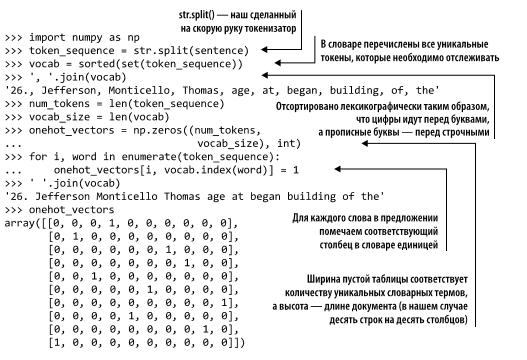

In [ ]:
import numpy as np
token_sequence=str.split(sentence)
vocab=sorted(set(token_sequence))
', '.join(vocab)
num_tokens=len(token_sequence)
vocab_size=len(vocab)
onehot_vectors=np.zeros((num_tokens, vocab_size), int)
for i, word in enumerate(token_sequence):
  onehot_vectors [i, vocab.index(word)]=1
''.join(vocab)

onehot_vectors


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### Если вам трудно быстро прочитать все эти единицы и нули, не отчаивайтесь — вы не одиноки.

С помощью объектов DataFrames библиотеки Pandas можно повысить удобство их восприятия и информативность. Pandas создает для одномерного массива адаптер со вспомогательной функциональностью — объект Series. Pandas особенно удобна для таблиц чисел, таких как списки списков, двумерные массивы NumPy, двумерные матрицы NumPy, массивы массивов, словари словарей и т. д.

Объект DataFrame отслеживает метки для всех столбцов, позволяя пометить каждый столбец в нашей таблице токеном или словом, которое он представляет. DataFrame также может отслеживать метки для каждой строки в DataFrame.index с целью обеспечения быстрого поиска. Для большинства приложений они обычно представляют собой просто последовательные целые числа. Пока мы будем использовать для строк в нашей таблице унитарных векторов предложения о Томасе Джефферсоне индекс по умолчанию из целых чисел

In [ ]:
import pandas as pd
pd.DataFrame(onehot_vectors, columns=vocab)

,26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0


Унитарные векторы предельно разреженные: в каждом векторе-строке содержится только одно ненулевое значение. Таким образом, мы можем сделать эту таблицу унитарных векторов еще красивее, заменив нули пробелами. Не стоит делать этого с каждым DataFrame, который вы намереваетесь использовать в своем конвейере машинного обучения, потому что тогда в массиве NumPy будет создано множество нечисловых объектов, что нарушит всю математику. Однако если задача просто в иллюстрации сходства последовательности унитарных векторов с механическим цилиндром музыкальной шкатулки или барабаном механического пианино, то рекомендуем обратить внимание на листинг ниже.

In [ ]:
df = pd.DataFrame(onehot_vectors, columns=vocab)
df[df == 0] = ''
df

,26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the
0,,,,1,,,,,,
1,,1,,,,,,,,
2,,,,,,,1,,,
3,,,,,,,,1,,
4,,,1,,,,,,,
5,,,,,,1,,,,
6,,,,,,,,,,1
7,,,,,1,,,,,
8,,,,,,,,,1,
9,1,,,,,,,,,


Мне хотелось бы сделать небольшой экскурс в математику, чтобы показать, насколько большими и громоздкими могут быть эти «бумажные ленты механического пианино». В большинстве случаев используемый в конвейере NLP словарь токенов будет содержать куда больше 10 или 20 тысяч токенов. Иногда это могут быть сотни тысяч и даже миллионы токенов. Представим, что в нашем словаре их ровно миллион. Пусть у вас также будет всего-навсего 3000 книжек, каждая из которых содержит 3500 предложений по 15 слов в каждом (вполне реалистичная средняя оценка для коротких книг). Получается огромное количество гигантских таблиц (матриц):

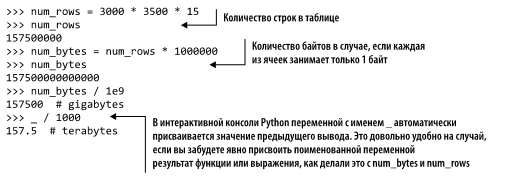

In [ ]:
num_rows=300*3500*15
print(num_rows)
num_bytes=num_rows*1000000 # Количество байтов, если каждая из ячеек занимает тоько 1 байт
print(num_bytes)
total_bytes=num_bytes/1e9

print(total_bytes)

print(total_bytes/1e3)

15750000
15750000000000
15750.0
15.75


Разберемся с тем, как можно поместить токены в двоичный вектор, указывающий на наличие или отсутствие конкретного слова в определенном предложении. Векторное представление набора предложений можно проиндексировать для отражения информации о том, какие слова в каком предложении используются. Этот индекс — эквивалент указателя в конце книги, за исключением того, что он указывает не на страницу, на которой встретилось слово, а на содержащее это слово предложение (или соответствующий вектор). В то время как в указателе обычно отмечены только основные слова, связанные с темой книги, мы отслеживаем все слова (по крайней мере сейчас). Именно так выглядит наш отдельный документ — предложение о Томасе Джефферсоне — в виде вектора мультимножества слов:

In [ ]:
sentence_bow = {}
for token in sentence.split():
   sentence_bow[token] = 1
sorted(sentence_bow.items())

[('26.', 1),
 ('Jefferson', 1),
 ('Monticello', 1),
 ('Thomas', 1),
 ('age', 1),
 ('at', 1),
 ('began', 1),
 ('building', 1),
 ('of', 1),
 ('the', 1)]

При сортировке с помощью функции sorted() в языке Python десятичные числа предшествуют символам, а прописные буквы — строчным. Таков порядок символов в кодировках ASCII и Unicode. В таблице ASCII прописные буквы располагаются перед строчными. Порядок слов в вашем словаре неважен. Пока вы последовательно создаете токены, конвейер машинного обучения будет одинаково работать с любым порядком слов.

Попробуем еще более эффективную форму словаря — класс Series библиотеки Pandas. С помощью объекта DataFrame библиотеки Pandas можно еще добавить предложения в корпус двоичных векторов ваших текстов о Томасе Джефферсоне. Все эти загадочные пропуски нулей в векторах и разницы разреженных и плотных мультимножеств слов станут более понятными по мере добавления новых предложений и соответствующих векторов мультимножеств слов в DataFrame (таблицу векторов, соответствующих текстам в корпусе):

In [ ]:
import pandas as pd
df = pd.DataFrame(pd.Series(dict([(token, 1) for token in sentence.split()])), columns=['sent']).T
df

,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent,1,1,1,1,1,1,1,1,1,1


Добавим еще немного текстов в наш корпус, чтобы увидеть нюансы организации DataFrame. Он индексирует как столбцы (документы), так и строки (слова), так что может служить и обратным индексом для поиска документов, если нужно быстро найти ответ на вопрос викторины.

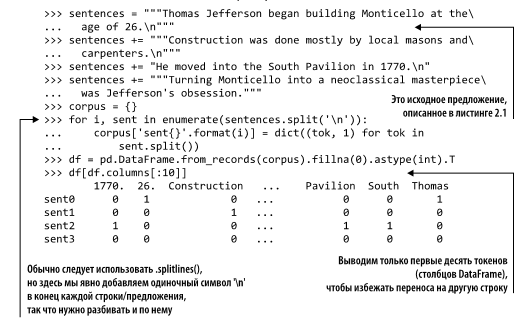

In [ ]:
sentences = "Thomas Jefferson began building Monticello at the age of 26. \n"
sentences+= "Construction was done mostly by local masons and carpenters.\n"
sentences+="He moved into the South Pavilion in 1770. \n"
sentences+="Turning Monticello into a neoclassical masterpiece was Jefferson's obsession."
#print(sentences)
corpus = {}
#corpus['sent0'] = dict((tok.strip('.'), 1) for tok in sentences.split())
for i, sent in enumerate(sentences.split('\n')):
  #print(dict((tok, 1) for tok in sent.split()))
  corpus['sent{}'.format(i)] = dict((tok, 1) for tok in sent.split())
df = pd.DataFrame.from_records(corpus).fillna(0).astype(int).T
df[df.columns[:10]]  # show just the first 7 tokens (columns)




,Thomas,Jefferson,began,building,Monticello,at,the,age,of,26.
sent0,1,1,1,1,1,1,1,1,1,1
sent1,0,0,0,0,0,0,0,0,0,0
sent2,0,0,0,0,0,0,1,0,0,0
sent3,0,0,0,0,1,0,0,0,0,0


### Скалярное произведение  векторов
В NLP часто применяется скалярное произведение, поэтому нужно четко понимать, что это такое. Можете пропустить подраздел, если вы с легкостью вычисляете такое произведение в уме. Скалярное произведение также называется внутренним произведением, так как размерности пары векторов (количество элементов в каждом из них) или матриц (число строк первой матрицы и столбцов второй) должны совпадать. Эта операция аналогична команде inner join для двух таблиц реляционной базы данных.

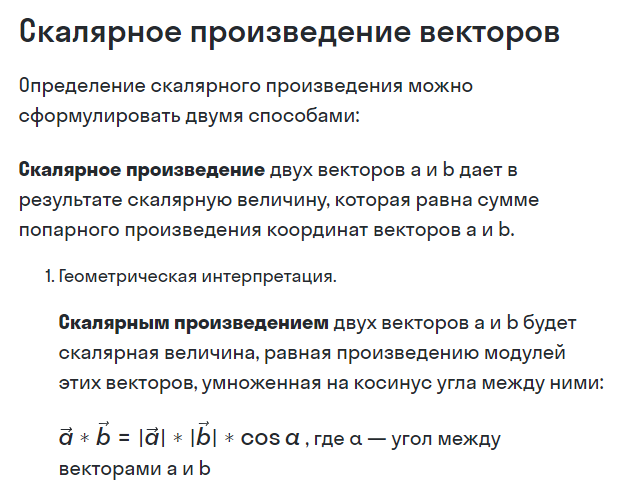

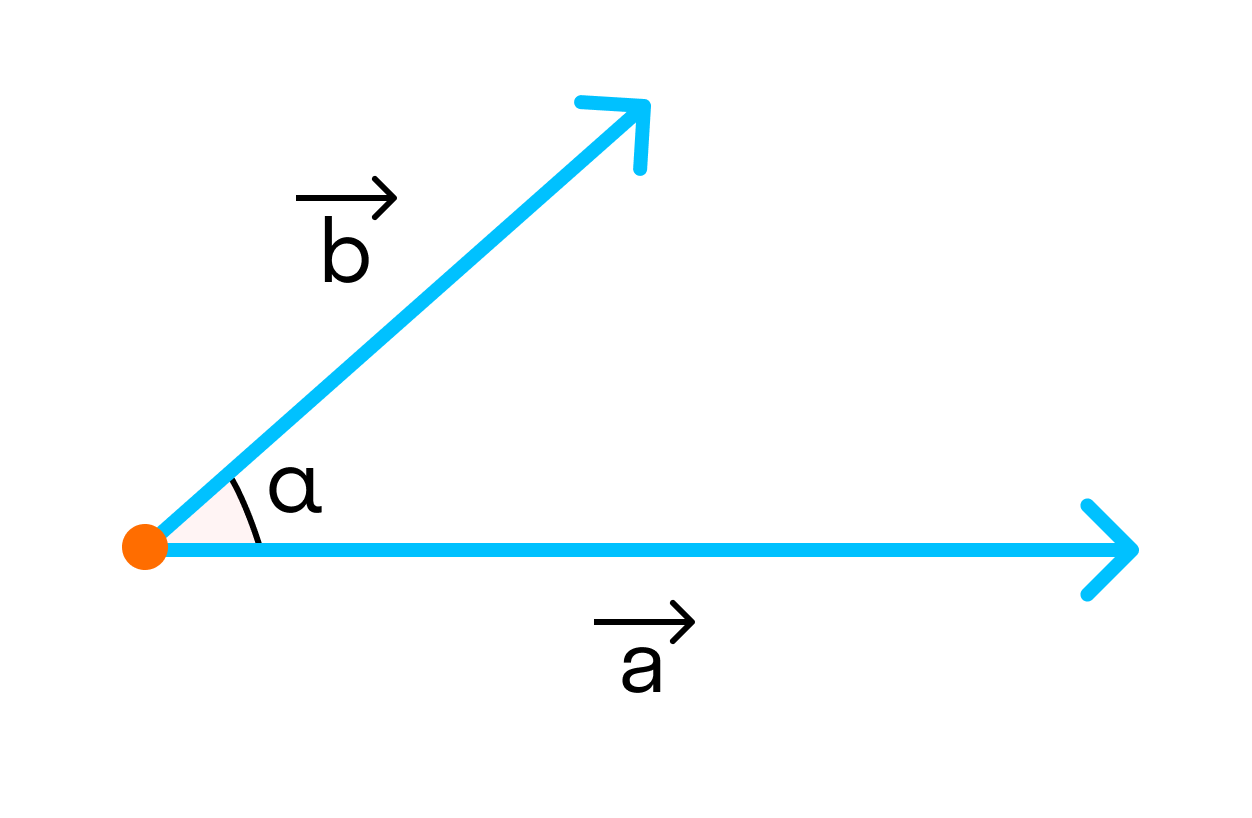

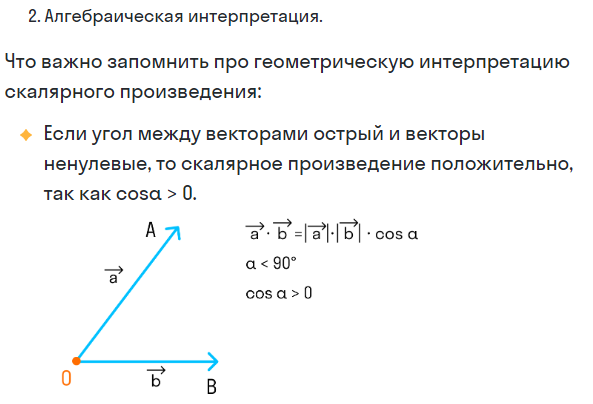

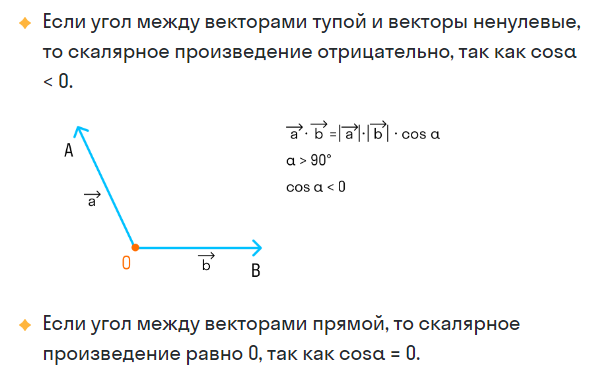

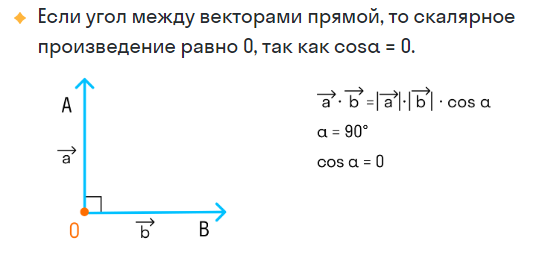

Из названия «скалярное произведение» также следует, что его результатом является одно скалярное значение. Это отличает его от векторного произведения (внешнего произведения, cross product), результат которого представляет собой вектор. Эти названия отражает форма соответствующих формальных математических обозначений, где скалярное произведение обозначается точкой (.), а векторное произведение — крестиком (x). Результат скалярного произведения равен сумме обычных произведений всех элементов одного вектора и всех элементов второго вектора.

Вот фрагмент кода на языке Python, который вы можете запустить, чтобы разобраться, что такое скалярное произведение

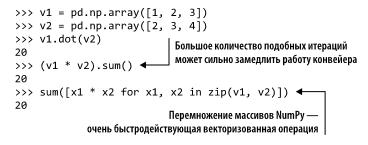

In [ ]:
import pandas as pd
v1=np.array([1,2,3])
v2=np.array([2,3,4])
v1.dot(v2)
(v1*v2).sum()
sum([x1*x2 for x1, x2 in zip(v1,v2)])


20

In [ ]:
## Linear algebra
### Dot product: product of two arrays
f = np.array([1,2])
g = np.array([4,5])
### 1*4+2*5
np.dot(f, g)

14

## Измерение мультимножеств слов для двух векторов

Если мы измерим пересечение мультимножеств слов для двух векторов, то сможем узнать, как сильно похожи применяемые в них слова. Эта оценка хорошо отражает сходство их смыслов. Воспользуемся скалярным произведением, чтобы оценить пересечения векторов мультимножеств слов между какими-нибудь новыми предложениями и предложением про Томаса Джефферсона

In [ ]:
df = df.T
print(df.sent0.dot(df.sent1))
print(df.sent0.dot(df.sent2))
print(df.sent0.dot(df.sent3))

0
1
1


Из этих результатов понятно, что одно из слов использовалось как в sent0, так и в sent2. Также одно из слов словаря применялось в обоих предложениях sent0 и sent3. Подобное пересечение слов является мерой их сходства. Что интересно, это странное предложение, sent1, единственное, в котором прямо не упоминались ни Джефферсон, ни Монтичелло, а был абсолютно другой набор слов для передачи информации об иных неизвестных людях. Ниже представлен один из способов нахождения общего слова для предложений sent0 и sent3. Именно это слово дало последнее скалярное произведение, равное единице:

Ниже представлен один из способов нахождения общего слова для предложений sent0 и sent3. Именно это слово дало последнее скалярное произведение, равное единице:

In [ ]:
[(k, v) for (k, v) in (df.sent0 & df.sent3).items() if v]

[('Monticello', 1)]

### Улучшение токенов

В некоторых ситуациях для разделения слов используются и другие символы, помимо пробелов. Кроме того, нам все еще мешает точка на конце токена 26.. Наш токенизатор должен разбивать предложение не только по пробелам, но и по знакам препинания, таким как запятые, точки, кавычки, точки с запятой и даже дефисы (тире). В некоторых случаях требуется, чтобы токенизатор относился к подобным знакам как к словам, то есть отдельным токенам. В других случаях их просто нужно игнорировать. В предыдущем примере последний токен предложения был испорчен точкой на конце 26.. Точка в конце может сбить с толку следующие этапы конвейера NLP, такие как стемминг, где схожие слова должны группироваться вместе согласно правилам, зависящим от единообразного написания слов. В листинге ниже демонстрируется один из способов.

In [ ]:
import re
sentence = "Thomas Jefferson began building Monticello at the age of 26."
tokens = re.split(r"([-\s.,;!?])+", sentence)
list(filter(lambda x: x if x not in '- \t\n.,;!?' else None, tokens))

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

Необходимо отфильтровать пробелы и знаки препинания, которые не должны включаться в словарь.

In [ ]:
[x for x in tokens if x != '' and x not in '- \t\n.,;!?']

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

Токенизаторы могут легко становиться очень сложными. Например, может потребоваться разбить текст по точкам, но только если за точкой не следует цифра, чтобы не разбивать десятичные числа. Другой пример, в котором не нужно разбивать текст по точке, — тогда точка является частью смайлика, как в сообщении Twitter. Токенизаторы реализованы в нескольких библиотеках Python, каждый со своими преимуществами и недостатками.

spaCy — точная, гибкая, быстрая, написана на Python.

Stanford CoreNLP — более точная, менее гибкая, быстрая, требует для работы Java 8.

NLTK — популярная, хорошо подходит для студентов, написана на Python.

NLTK и Stanford CoreNLP — самые давние и широко применяемые для сравнения алгоритмов NLP в научных статьях библиотеки. Несмотря на то что у библиотеки Stanford CoreNLP есть API Python, она основана на прикладной части Java 8 CoreNLP, которую необходимо устанавливать и настраивать отдельно. Поэтому, чтобы быстро приступить к работе, проще использовать токенизатор Natural Language Toolkit (NLTK). Это позволит воспроизвести результаты, которые можно встретить в научных статьях и блогах.

Для моделирования нашего простого примера токенизатора можно воспользоваться функцией RegexpTokenizer из библиотеки NLTK:


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')
tokenizer.tokenize(sentence)

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26',
 '.']

Этот токенизатор немного лучше, чем тот, который вы использовали изначально, поскольку игнорирует пробельные символы. Он также отделяет завершающие предложение знаки пунктуации от токенов, не содержащих других знаков препинания.

Одним из лучших токенизаторов является Word Tokenizer Treebank, входящий в состав библиотеки NLTK. В нем множество общих правил для токенизации английских слов. К примеру, он отделяет завершающие фразу знаки препинания (?!.;,) от соседних токенов и сохраняет десятичные числа, содержащие точку, в качестве отдельного токена. Кроме того, он включает правила токенизации для английских сокращений. Например, don’t токенизируется как ["do", "n't"]. Этот метод токенизации поможет на последующих шагах конвейера NLP, таких как стемминг. Вы можете найти все правила токенизатора Treebank по адресу wwwйnltkйorgкapiкnltkйtokeи nizeйhtml#moduleиnltkйtoke nizeйtreebank.

In [ ]:
 from nltk.tokenize import TreebankWordTokenizer
 sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
 tokenizer = TreebankWordTokenizer()
 tokenizer.tokenize(sentence)

['Monticello',
 'was',
 "n't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987',
 '.']

## Сокращения

Наверняка вы недоумеваете, зачем было разбивать сокращение wasn't на токены was и n't. Для некоторых приложений, например основанных на грамматике моделей NLP, использующих синтаксические деревья, важно разделять слова was и not, чтобы входные данные синтаксического анализатора представляли собой согласованный предсказуемый набор токенов с известными грамматическими правилами. Существует множество стандартных и нестандартных способов сокращения слов. При сведении сокращений до составляющих их слов достаточно запрограммировать анализатор дерева зависимостей или синтаксический анализатор так, чтобы учесть лишь различные варианты написания отдельных слов, а не все возможные сокращения.



## Токенезация неформального текста из социальных сетей, таких как  Twitter  Facebook

Библиотека NLTK включает в себя токенизатор casual_tokenize для работы с короткими, неформальными, сдобренными смайликами текстами из социальных сетей, где грамматика и правописание сильно варьируются.
Функцией casual_tokenize можно выделять имена пользователей и сокращать количество повторяющихся символов в токене:

In [ ]:
from nltk.tokenize.casual import casual_tokenize
message = "RT @TJMonticello Best day everrrrrrr at Monticello. Awesommmmmmeeeeeeee day :*)"
print(casual_tokenize(message))
print(casual_tokenize(message, reduce_len=True, strip_handles=True))


['RT', '@TJMonticello', 'Best', 'day', 'everrrrrrr', 'at', 'Monticello', '.', 'Awesommmmmmeeeeeeee', 'day', ':*)']
['RT', 'Best', 'day', 'everrr', 'at', 'Monticello', '.', 'Awesommmeee', 'day', ':*)']


## Расширяем словарь n - граммами
  
  Вернемся к проблеме слов ice cream, поднятой в начале главы. Помните, мы говорили о том, чтобы попытаться сохранить ice и cream вместе: I scream, you scream, we all scream for ice cream. Хотим отметить, что знаем не слишком много людей, готовых кричать от радости при виде сливок (cream). И уж точно никто не будет кричать из-за льда (ice), если они, конечно, не поскользнулись на нем. Таким образом, вам нужно, чтобы в наших векторах слова ice и cream были вместе.

Воспользуемся уже известным нам предложением о Томасе Джефферсоне для демонстрации ожидаемых результатов работы токенизатора биграмм, чтобы вы понимали, что мы пытаемся создать:


In [ ]:
!pip install nltk

In [ ]:
import re
sentence = """Thomas Jefferson began building Monticello at the age of 26."""
pattern = re.compile(r"([-\s.,;!?])+")
tokens = pattern.split(sentence)
tokens = [x for x in tokens if x and x not in '- \t\n.,;!?']
tokens

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26']

In [ ]:
from nltk.util import ngrams
two_grams = list(ngrams(tokens, 2))
print(two_grams)
tg1 = [" ".join(x) for x in two_grams]
print(tg1)
print('--------------')
three_grams = list(ngrams(tokens, 3))
print(three_grams)
tg2 = [" ".join(x) for x in three_grams]
print(tg2)

[('Thomas', 'Jefferson'), ('Jefferson', 'began'), ('began', 'building'), ('building', 'Monticello'), ('Monticello', 'at'), ('at', 'the'), ('the', 'age'), ('age', 'of'), ('of', '26')]
['Thomas Jefferson', 'Jefferson began', 'began building', 'building Monticello', 'Monticello at', 'at the', 'the age', 'age of', 'of 26']
--------------
[('Thomas', 'Jefferson', 'began'), ('Jefferson', 'began', 'building'), ('began', 'building', 'Monticello'), ('building', 'Monticello', 'at'), ('Monticello', 'at', 'the'), ('at', 'the', 'age'), ('the', 'age', 'of'), ('age', 'of', '26')]
['Thomas Jefferson began', 'Jefferson began building', 'began building Monticello', 'building Monticello at', 'Monticello at the', 'at the age', 'the age of', 'age of 26']


## Стоп-слова

 Стоп-слова — это распространенные слова на любом языке, которые встречаются очень часто, но несут в себе гораздо меньше содержательной информации о смысле фразы. Вот примеры некоторых распространенных стоп-слов:

1.    a, an;
2.   the, this;
3.   the, this;
4.   of, on.
5.   and, or;


 Изначально стоп-слова не использовались в конвейерах NLP. Это делалось для уменьшения сложности вычислений при извлечении информации из текста. Несмотря на то что сами эти слова обычно малоинформативны, они могут нести важную информацию при использовании их как части n-граммы. Рассмотрим два примера.

 Mark reported to the CEO;

 Suzanne reported as the CEO to the board.

В конвейере NLP можно использовать 4-граммы, такие как reported to the CEO и reported as the CEO. Если убрать стоп-слова из этих 4-грамм, то они превратятся в выражение reported CEO, лишившись информации об иерархии в компании. В первом примере Марк, скорее всего, помощник какого-то генерального директора (CEO). Сьюзан, в свою очередь, сама является генеральным директором и докладывает непосредственно совету директоров. К сожалению, сохранение стоп-слов в конвейере приводит к возникновению другой проблемы — увеличению длины n-грамм, необходимой для использования связей, формируемых стоп-словами, которые в противном случае окажутся бессмысленными. В результате придется сохранить как минимум 4-граммы, чтобы избежать неоднозначности, описанной в примере с персоналом. Процесс разработки фильтра стоп-слов зависит от каждого конкретного приложения. Вычислительную сложность и требования к памяти для всех последующих этапов конвейера NLP определяет размер словаря. Стоит отметить, что список стопслов составляет лишь небольшую часть словаря. Обычно такие списки содержат около 100 слов. Для отслеживания 95 % слов, встречающихся в большом корпусе твитов, сообщений в блогах и новостных статей, потребуется словарь на 20 000 слов

Для фильтрации же случайным образом при токенизации набора стоп-слов достаточно и спискового включения языка Python. Ниже представлен фрагмент кода, в котором игнорируется несколько стоп-слов при проходе в цикле по списку токенов:


In [ ]:
stop_words = ['a', 'an', 'the', 'on', 'of', 'off', 'this', 'is']
tokens = ['the', 'house', 'is', 'on', 'fire']
tokens_without_stopwords = [x for x in tokens if x not in stop_words]
print(tokens_without_stopwords)

['house', 'fire']


Вы уже обратили внимание, что часть слов содержит куда больше информации по сравнению с остальными? В некоторых предложениях можно опустить больше половины слов без особого ущерба для общего смысла. Зачастую точку зрения можно выразить без артиклей, предлогов и даже форм глагола to be. Представьте, что кто-то говорит на языке жестов или в спешке пишет напоминание для себя. Какие слова обычно при этом опускаются?

Именно так и выбираются стоп-слова. На данный момент NLTK, вероятно, наиболее полный список канонических стоп-слов

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
print(len(stop_words))
print(stop_words[:10])
[sw for sw in stop_words if len(sw) == 1]

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'a', 's', 't', 'd', 'm', 'o', 'y']

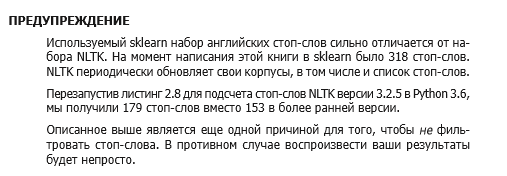

В зависимости от того, сколько информации на естественном языке нужно отбросить, можно использовать в конвейере объединение или пересечение нескольких списков стоп-слов. Ниже приводится сравнение списков стоп-слов sklearn

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
print(len(sklearn_stop_words))

318


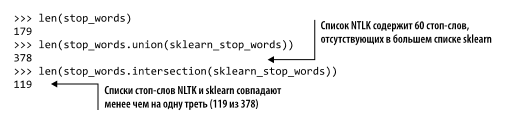

In [ ]:
len(stop_words)

179

In [ ]:
len(sklearn_stop_words)


318

In [ ]:
v=set(stop_words)
v1=set(sklearn_stop_words)
#v1.union(v2)
print(len(v.union(v1)))

378


In [ ]:
print(len(v.intersection(v1)))

119


## Нормализация словаря

 Надеемся, вы уже успели заметить, какую важную роль в производительности конвейера NLP играет размер словаря. Еще одна из техник уменьшения его размера — объединение токенов, означающих сходные вещи, в единую нормализованную форму. Подобная техника позволяет уменьшить количество хранимых токенов и улучшает связи между смыслами фраз с разным «написанием» токенов или n-грамм, а также, как уже упоминалось, снижает вероятность переобучения


## Выравнивание регистра

Выравнивание регистра (case folding) — объединение нескольких вариантов написания слова, различающихся только регистром букв. Для чего вообще это нужно? Различные слова могут денормализоваться по регистру из-за написания с прописной буквы слов в начале предложения или вообще написания ТОЛЬКО ПРОПИСНЫМИ буквами для выделения в тексте. Противоположная денормализации операция называется нормализацией (case normalization) или выравниванием регистра (case folding). Нормализация регистра слов и отдельных букв — один из способов уменьшения размера словаря и обобщения конвейера NLP. Данный способ помогает объединить слова, которые должны означать одно и то же (и быть написанными одинаково) в один токен.

В языке программирования Python нормализацию регистра символов можно легко осуществить с помощью спискового включения.


In [ ]:
tokens = ['House', 'Visitor', 'Center']
normalized_tokens = [x.lower() for x in tokens]
print(normalized_tokens)

['house', 'visitor', 'center']


## Стемминг

Другим распространенным методом нормализации является устранение небольших смысловых различий, связанных с окончаниями множественного числа и притяжательными окончаниями слов или даже различными формами глаголов. Данный способ нормализации, заключающийся в поиске общей основы различных форм слова, называется «стемминг». Например, общая основа слов housing и houses — house. Стемминг удаляет суффиксы из слов в попытке сгруппировать слова со схожим смыслом под общей основой. Основа не обязана быть допустимым орфографически словом, она может быть просто токеном или меткой, представляющей несколько возможных вариантов написания.

Стоит отметить, что стемминг может значительно снизить показатель точности поисковой системы, поскольку она может возвращать гораздо больше не относящихся к делу документов, помимо релевантных. В некоторых приложениях эта доля ложноположительных результатов (доля возвращаемых бесполезных страниц) может быть проблемой. Поэтому большинство поисковых систем позволяет отключать стемминг и даже нормализацию регистра — для этого следует заключить в кавычки слово или фразу. Использование кавычек означает, что вам нужны только страницы, содержащие точное написание фразы, например Portland Housing Development software. Подобный запрос не вернул бы документ с фразой a Portland software developer’s house. Иногда бывает нужно найти информацию по запросу Dr.

House's calls, но не по запросу dr. house call, которая была бы возвращена в случае использования стеммера. Вот простая реализация стеммера на чистом Python, умеющего обрабатывать конечные символы S's:


In [ ]:
 def stem(phrase):
   return ' '.join([re.findall('^(.*ss|.*?)(s)?$',word)[0][0].strip("'") for word in phrase.lower().split()])
stem('houses')
stem("Doctor House's calls")

'doctor house call'

Описанная выше функция стеммера следует нескольким простым правилам, в рамках указанного короткого регулярного выражения.

Если слово оканчивается более чем одним s, основой считается слово, а суффиксом — пустая строка.

Если слово оканчивается одним s, основа — это слово без s, а суффикс — s.

Если слово не заканчивается на s, основа — это слово, суффикс не возвращается.

Метод удаления суффиксов приводит к выделению основы по крайней мере некоторых притяжательных слов наряду со словами во множественном числе. Функция хорошо работает в обычных условиях, однако подходит и для более сложных случаев. Например, вышеприведенные правила нарушаются для слов вроде dishes или heroes. Для таких более сложных случаев в пакете NLTK предусмотрены другие стеммеры. Данная функция также не справляется со словом housing из примера про Portland Housing.

Двумя наиболее популярными алгоритмами являются стеммер Портера и Snowball. Стеммер Портера назван в честь специалиста в области компьютерных наук Мартина Портера (Martin Porter)1. Портеру мы обязаны и усовершенствованной версией его стеммера под названием Snowball2. Мартин посвятил большую часть своей долгой карьеры документированию и улучшению стеммеров ввиду важности их роли в поиске информации (поиске по ключевым словам). Описанные выше стеммеры реализуют более сложные, чем обычные регулярные выражения, правила. Это позволяет справляться со сложностями правил правописания и окончания слов английского языка:

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
' '.join([stemmer.stem(w).strip("'") for w in "dish washer's washed dishes".split()])

'dish washer wash dish'

### Лемматизация

Лемматизация — это процесс преобразования слова в его базовую форму. Разница между стемминг (stemming) и лемматизацией заключается в том, что лемматизация учитывает контекст и преобразует слово в его значимую базовую форму, тогда как стемминг просто удаляет последние несколько символов, что часто приводит к неверному значению и орфографическим ошибкам.

Например, лемматизация правильно определила бы базовую форму «caring» и «care», в то время как стемминг отрезал бы «ing» и преобразовал ее в car.

### «Caring» -> Лемматизация -> «Care»

### «Caring» -> Стемминг -> «Car»

Кроме того, иногда одно и то же слово может иметь несколько разных лемм. Основываясь на контексте, который вы используете, вы должны определить тег «part-of-speech» (POS) для слова в этом конкретном контексте и извлечь соответствующую лемму. Примеры реализации этого приведены в следующих разделах.

В этом уроке мы рассмотри, реализацию лемматизации с помощью следующих пакетов Python.

Wordnet Lemmatizer

Spacy Lemmatizer

TextBlob

CLiPS Pattern

Stanford CoreNLP

Gensim Lemmatizer

TreeTagger

Как определить леммы слов в Python? В пакете NLTK есть специальные функции для этого. Обратите внимание, что необходимо указать WordNetLemmatizer интересующую часть речи, чтобы найти наиболее точную лемму:


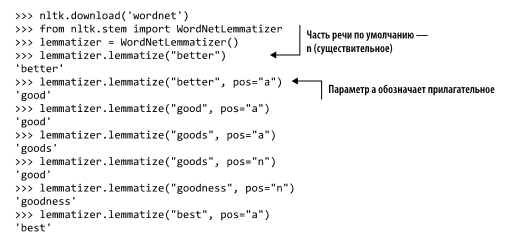

In [ ]:
# How to install and import NLTK
# In terminal or prompt:
# pip install nltk
# # Download Wordnet through NLTK in python console:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Возможно, вы удивитесь, что первая попытка лемматизации better не изменила его вообще. Так произошло потому, что часть речи слова может сильно влиять на его значение. Если часть речи для слова не указана, лемматизатор NLTK предполагает, что это существительное. При указании правильной части речи, “a” в случае прилагательного, лемматизатор возвращает правильную лемму. К сожалению, лемматизатор NLTK ограничен связями, описанными внутри графа значений слов Wordton WordNet. Таким образом, в результате лемматизации best не получается тот же корень, что и при лемматизации better. В этом графе также отсутствует связь между goodness и good. Стеммер Портера создал бы эту связь, просто убирая окончание ness из всех слов:

In [ ]:
stemmer.stem('goodness')

'good'

### Сценарии использования

В каких случаях следует использовать лемматизатор, а в каких — стеммер? По-
следние, как правило, работают быстрее и требуют менее сложного кода и мень-
ших наборов данных. Однако они более подвержены ошибкам и сводят к одной основе гораздо большее количество слов, сокращая тем самым информационное
содержание (смысл) текста намного сильнее, чем лемматизаторы. Обе технологии уменьшают размер словаря и увеличивают неоднозначность текста, однако лем-
матизаторы работают лучше, сохраняя как можно больше полезной информации на основе применения слова в тексте и его желаемого смысла. Поэтому некоторые пакеты NLP, такие как spaCy, не включают функции для стемминга, а только ме-
тоды для лемматизации.

Если приложение связано с поиском информации, использование стемминга
и лемматизации повысит его чувствительность и сопоставит тем же словам запроса
больше документов. Тем не менее стемминг, лемматизация и выравнивание регистра
значительно снижают точность результатов поиска.

## ВАЖНО

Подводя итог сказанному выше, хочется попросить максимально избегать ис-
пользования стемминга и лемматизации, за исключением небольших текстов,
содержащих искомые слова в различном регистре. Учитывая лавинообразный
рост размеров наборов данных NLP, такое редко имеет место для документов на английском языке, разве что тексты изобилуют жаргонизмами или относятся к очень узкой области науки, техники или литературы. Впрочем,
для текстов, написанных на отличных от английского языках, лемматизация
все еще может принести пользу. Стэнфордский курс по поиску информации
целиком исключает стемминг и лемматизацию ввиду пренебрежимо малого
увеличения чувствительности и сильного снижения уровня точности2

### VADER — анализатор тональности на основе правил

#### Введение в анализ тональности

Анализ тональности текста — это процесс определения эмоциональной окраски текстовой информации. Это важная задача в области обработки естественного языка (Natural Language Processing, NLP), которая находит применение во многих областях, таких как социальные медиа, отзывы пользователей, новостные агрегаторы и другие системы, требующие понимания человеческих эмоций через текст.

#### VADER: Общий обзор

VADER (Valence Aware Dictionary and sEntiment Reasoner) — это инструмент для анализа тональности текста, разработанный для работы с социальными медиа. Он основан на правилах и использует словарь с оценками положительных, отрицательных и нейтральных слов, а также правила для учета интенсивности и пунктуации.

#### Основные характеристики VADER

1. **Словарь с оценками слов**: VADER использует предварительно созданный словарь, в котором каждому слову присвоена оценка в диапазоне от -4 до +4, где отрицательные значения соответствуют негативной окраске, положительные — положительной, а 0 — нейтральной.

2. **Правила для учета интенсивности**: VADER учитывает интенсивность эмоций с помощью усиливающих и ослабляющих слов (например, "очень", "не очень"), что позволяет более точно определять степень эмоциональной окраски.

3. **Учет пунктуации**: VADER учитывает эмоциональную нагрузку пунктуации, например, восклицательных знаков, которые могут указывать на сильные эмоции.

4. **Расчет общего сентимента**: На основе оценок слов и применения правил, VADER вычисляет общую оценку тональности текста. Результат представлен числом в диапазоне от -1 (очень негативный) до +1 (очень положительный), а также может включать учет нейтральности.

#### Примеры использования VADER

##### Пример 1:
Текст: "Этот фильм был просто потрясающий! Я наслаждался каждой минутой."



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
sentence = "Этот фильм был просто потрясающий! Я наслаждался каждой минутой."
scores = analyzer.polarity_scores(sentence)

print(scores)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



В данном примере VADER распознал текст как положительный (compound score = 0.7717).

##### Пример 2:
Текст: "Это была самая скучная книга, что я когда-либо читал."



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentence = "Это была самая скучная книга, что я когда-либо читал."
scores = analyzer.polarity_scores(sentence)

print(scores)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


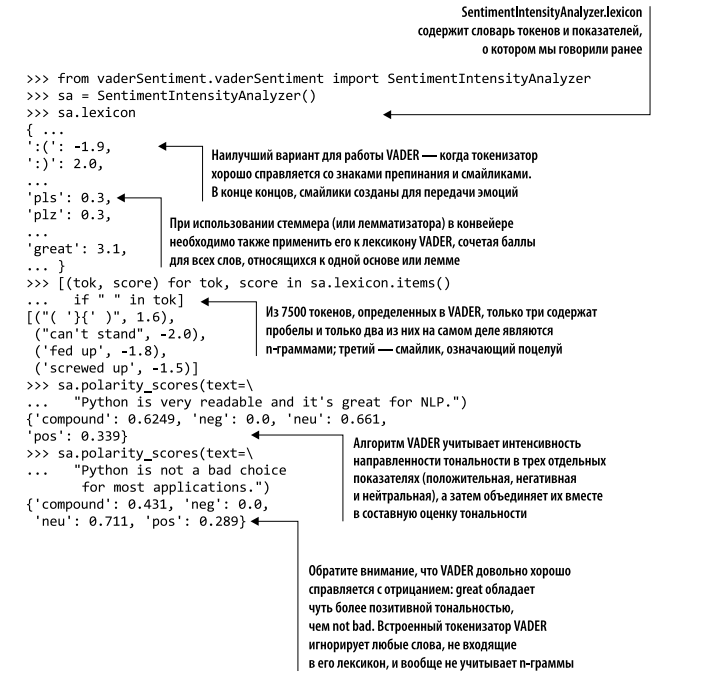

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa=SentimentIntensityAnalyzer()
sa.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [ ]:
[(tok, score) for tok, score in sa.lexicon.items() if " " in tok]

[("( '}{' )", 1.6),
 ("can't stand", -2.0),
 ('fed up', -1.8),
 ('screwed up', -1.5)]

In [ ]:
sa.polarity_scores(text="Python is readable and it's great for NLP.")

{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

In [ ]:
sa.polarity_scores(text="I Love You, You’re Perfect, Now Change.")

{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'compound': 0.836}

In [ ]:
sa.polarity_scores(text="Kiss me, Kiss me with your eyes closed Whisper that your heart shows.")

{'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.8689}

In [ ]:
sa.polarity_scores(text="Python is not a bed choice for most applications.")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sa.polarity_scores(text="Do not correct a fool, or he will hate you; correct a wise man, and he will appreciate you.")

{'neg': 0.138, 'neu': 0.557, 'pos': 0.305, 'compound': 0.5432}

Посмотрим, как этот основанный на правилах подход работает с вышеупомяну-
тыми примерами высказываний:

In [ ]:
corpus = ["Absolutely perfect! Love it! :-) :-) :-)", "Horrible! Completely useless. :(", "It was OK. Some good and some bad things."]
# Абсолютно идеально! Люблю это! :-) :-) :-), Ужасный! Совершенно бесполезно. :(,   Это было хорошо. Некоторые хорошие и некоторые плохие вещи.
for doc in corpus:
  scores = sa.polarity_scores(doc)
  print('{:+}: {}'.format(scores['compound'], doc))

+0.9428: Absolutely perfect! Love it! :-) :-) :-)
-0.8768: Horrible! Completely useless. :(
-0.1531: It was OK. Some good and some bad things.


Похоже, то что надо. Единственным недостатком VADER является то, что он
не просматривает все слова в документе, только около 7500. Как же добиться, что-
бы все слова учитывались в показателе тональности? И как избежать кодирования
вручную своего понимания слов в словаре, состоящем из тысяч слов или добавления
пользовательских слов в словарь SentimentIntensityAnalyzer.lexicon? Использо-
вание подхода, основанного на правилах, невозможно без знания языка, а значит,
и понимания, какие показатели должны быть в словаре!
Именно для таких случаев предназначены конвейеры машинного обучения.


Таким образом, VADER — мощный инструмент для анализа тональности текста, основанный на правилах и словаре. Он широко используется в NLP для быстрой оценки эмоциональной окраски текста, хотя его точность может варьироваться в зависимости от контекста и типа текста. Этот подход делает его особенно подходящим для анализа текстов из социальных медиа и других источников, где присутствует большое количество неформальной и эмоционально окрашенной лексики.